In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


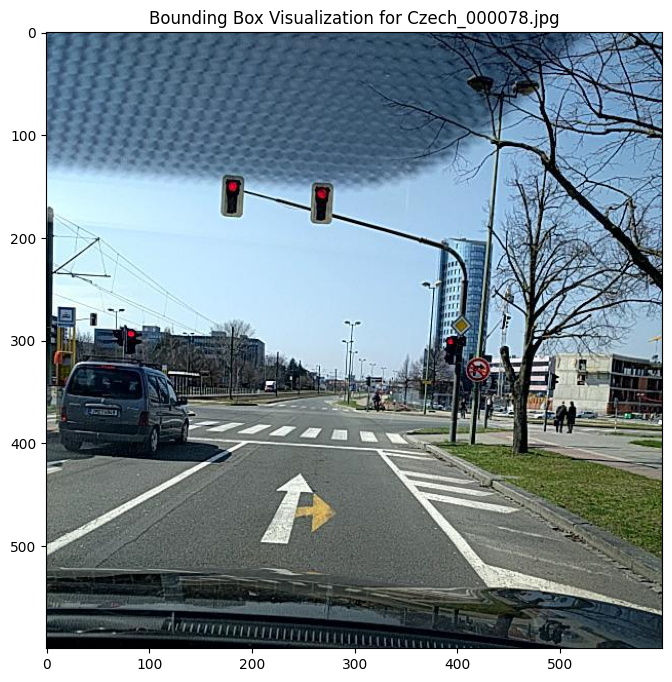

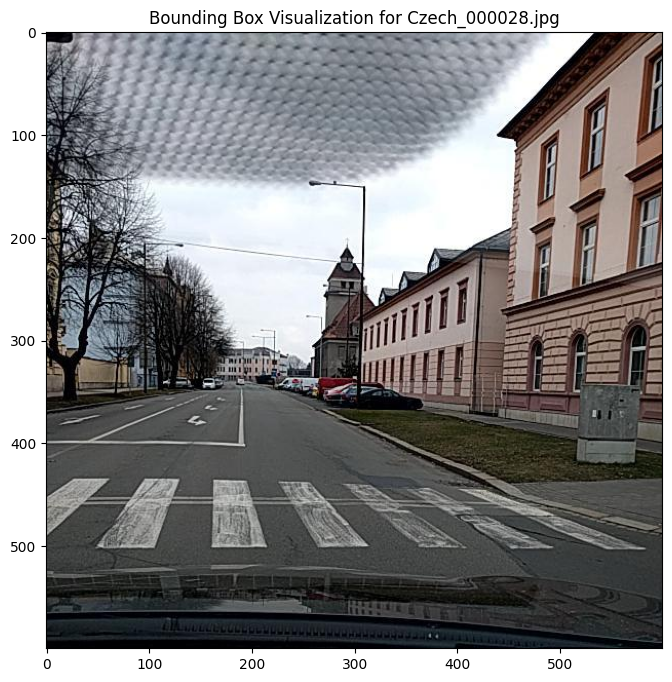

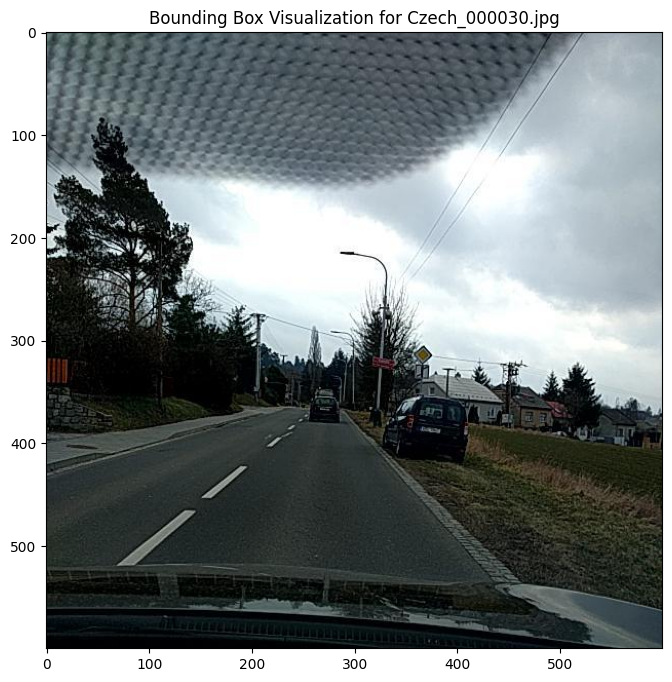

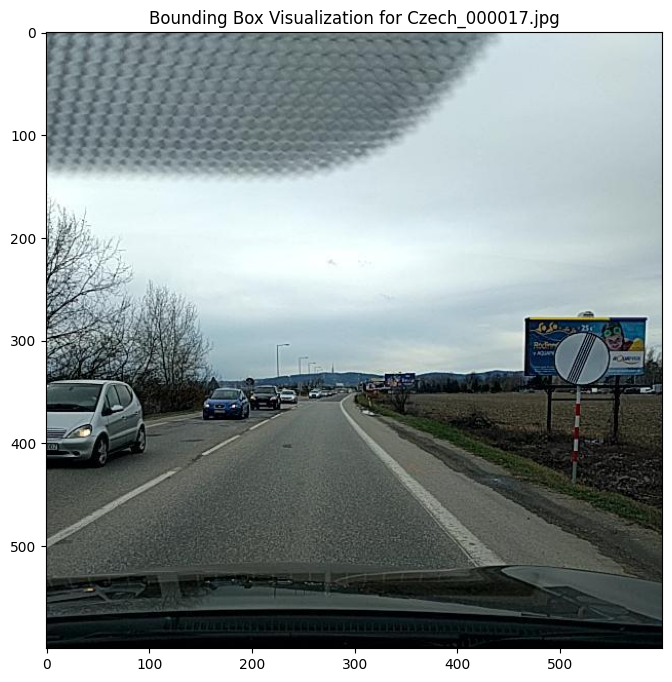

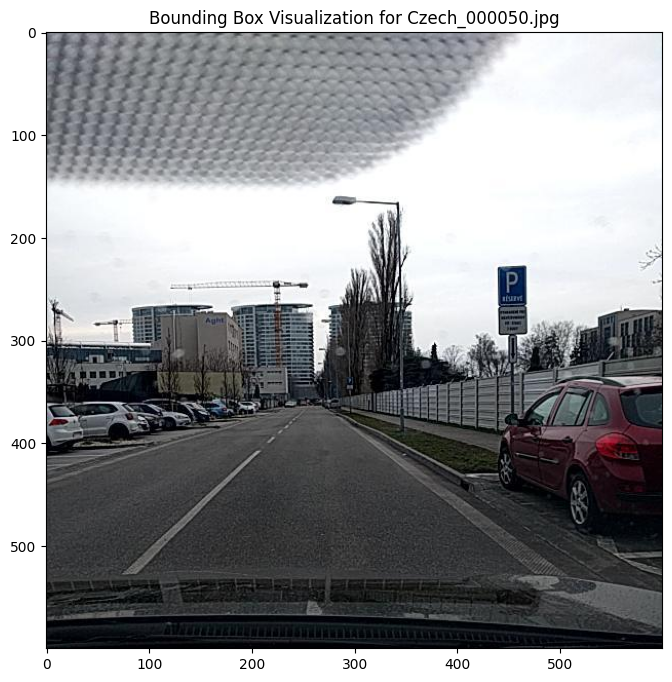

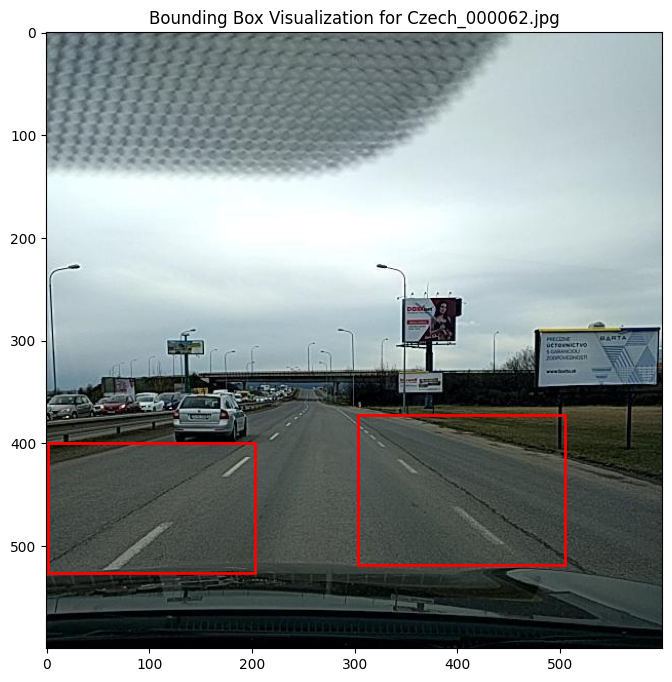

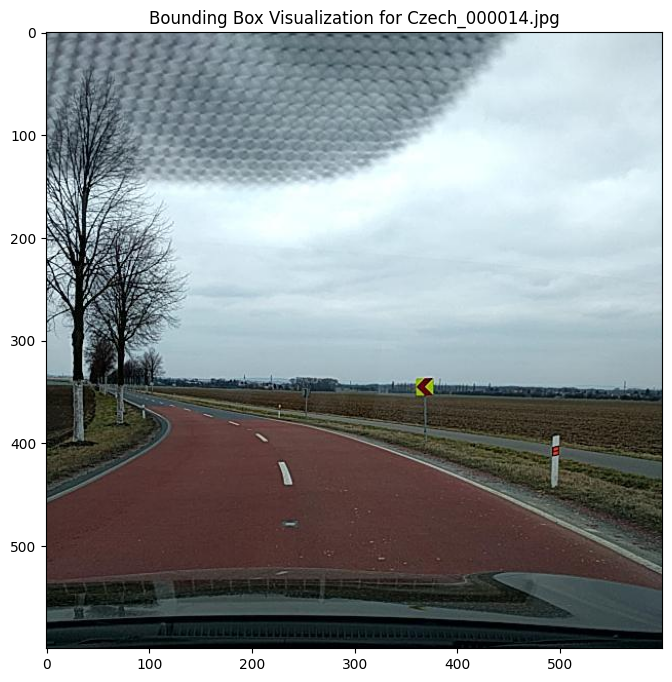

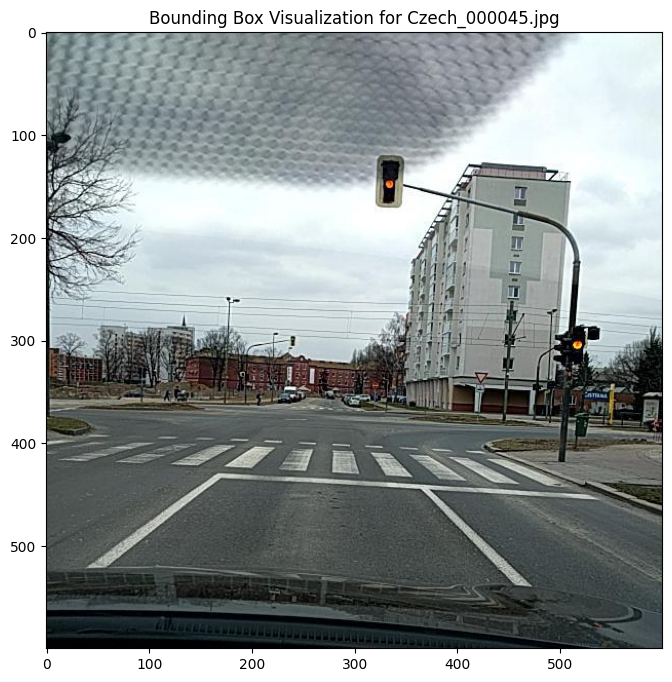

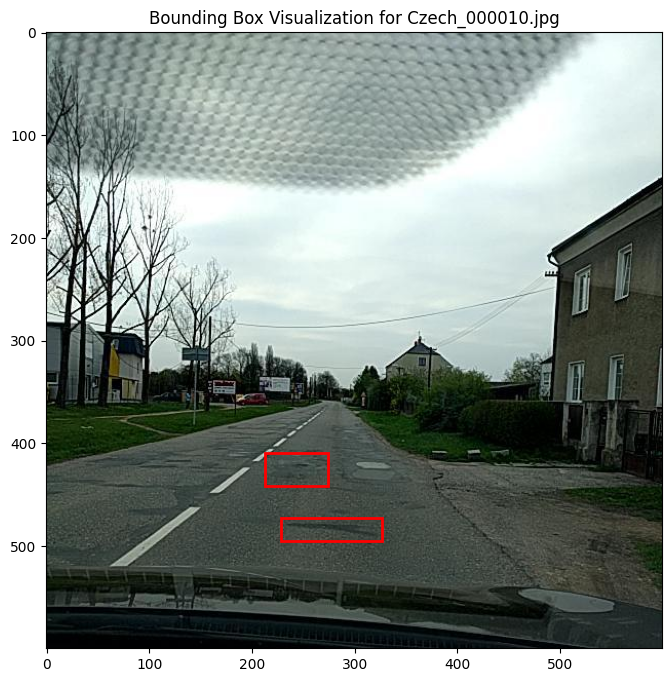

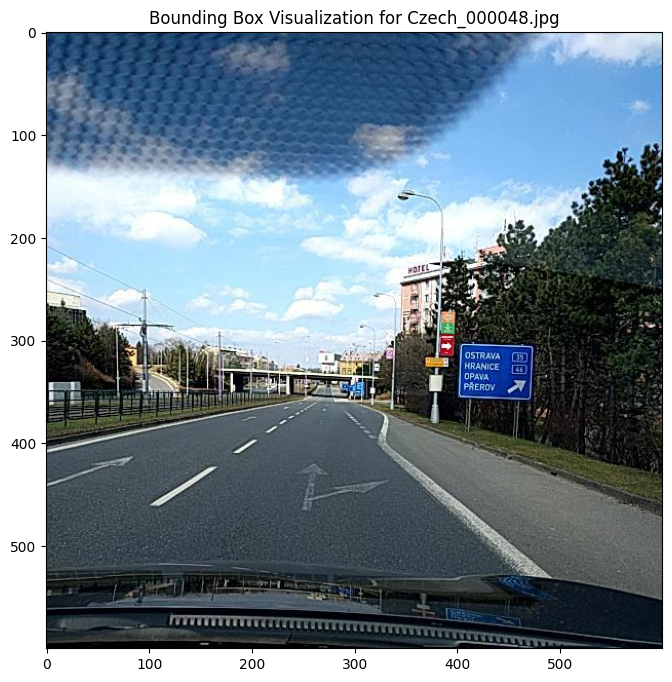

KeyboardInterrupt: 

In [ ]:

def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Extract image size
    size_element = root.find("size")
    width = int(size_element.find("width").text)
    height = int(size_element.find("height").text)
    depth = int(size_element.find("depth").text)

    # Extract all damages
    damages = root.findall("object")

    if not damages:
        return {
            'width': width,
            'height': height,
            'depth': depth,
            'damages': []
        }

    # Extract damage details for each type
    damage_list = []
    for damage_element in damages:
        damage_type = damage_element.find("name").text
        bbox_element = damage_element.find("bndbox")
        xmin = int(bbox_element.find("xmin").text)
        ymin = int(bbox_element.find("ymin").text)
        xmax = int(bbox_element.find("xmax").text)
        ymax = int(bbox_element.find("ymax").text)

        damage_info = {
            'damage_type': damage_type,
            'bbox': {'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax}
        }
        damage_list.append(damage_info)

    return {
        'width': width,
        'height': height,
        'depth': depth,
        'damages': damage_list
    }

def visualize_bounding_boxes(image_path, annotation_info):
    image = Image.open(image_path)

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    damages = annotation_info['damages']

    for damage_info in damages:
        bbox = damage_info['bbox']
        damage_type = damage_info['damage_type']

        if bbox is not None:
            # Create a rectangle patch
            rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'],
                                     linewidth=2, edgecolor='r', facecolor='none', label=f"Damage Type: {damage_type}")
            ax.add_patch(rect)

    plt.title(f"Bounding Box Visualization for {os.path.basename(image_path)}")
    plt.show()


def import_and_visualize_dataset(root_dir):
    dataset = []

    images_folder = os.path.join(root_dir, 'images')
    annotations_folder = os.path.join(root_dir, 'annot')

    for filename in os.listdir(images_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(images_folder, filename)
            xml_filename = os.path.splitext(filename)[0] + ".xml"
            xml_path = os.path.join(annotations_folder, xml_filename)

            if os.path.exists(xml_path):
                annotation_info = parse_xml(xml_path)
                annotation_info['image_path'] = image_path
                dataset.append(annotation_info)

                visualize_bounding_boxes(image_path, annotation_info)

# Example usage:
root_directory = '/content/'
import_and_visualize_dataset(root_directory)